In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import datetime as dt
import warnings

#To hide all warning messages
warnings.filterwarnings("ignore")

In [78]:
loan_data_df=pd.read_csv("loan.csv") 

# 1. Data Cleaning

### 1.1 Check for header/footer, unnecessary rows which need to be deleted

In [79]:
#Shape of the data frame
loan_data_df.shape

(39717, 111)

In [80]:
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [81]:
loan_data_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# As we can see there is no header or footer rows present which need to be deleted

In [83]:
loan_data_df["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [84]:
# We need to delete the rows which have "loan_status" as "Current". 
# Lender who are still paying loans, they can fully pay the loan or can be charged off
# These rows will not help us make decision

In [85]:
# Total number of rows before removing the rows having "loan_status" as "Current"
total_rows=len(loan_data_df)
print("total no. of rows: ",total_rows)

total no. of rows:  39717


In [86]:
loan_data_df=loan_data_df[loan_data_df['loan_status']!='Current']

In [87]:
total_rows_after_deletion=len(loan_data_df)
print("total no. of deleted rows: ",total_rows_after_deletion)

total no. of deleted rows:  38577


In [88]:

print("% of rows deleted: ", round(((total_rows - total_rows_after_deletion)/total_rows)*100,2))

% of rows deleted:  2.87


### 1.2 Delete unnecessary columns

In [89]:
loan_data_df.shape

(38577, 111)

In [90]:
# Delete the columns which are having all the values as Null
loan_data_df.dropna(axis=1, how="all", inplace=True)

In [91]:
# Deleting the columns which are having all unique values. 
#If all the values are unique then these columns will not contibute to EDA
unique_columns=[x for x in loan_data_df.columns if loan_data_df[x].nunique() == len(loan_data_df)]
unique_columns

['id', 'member_id', 'url']

In [92]:
# Delete the columns 'member_id' and 'url'
loan_data_df.drop(columns=['member_id','url'],axis=1, inplace=True)

In [93]:
loan_data_df.shape

(38577, 54)

In [94]:
# Delete the columns which are having values as text/description as these columns will not contribute to EDA
loan_data_df.drop(columns=['desc','title','emp_title'], inplace=True)

In [95]:
loan_data_df.shape

(38577, 51)

In [96]:
loan_data_df.nunique().sort_values()

tax_liens                         1
initial_list_status               1
out_prncp                         1
pymnt_plan                        1
out_prncp_inv                     1
policy_code                       1
collections_12_mths_ex_med        1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
application_type                  1
term                              2
loan_status                       2
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq      

In [97]:
single_valued_columns=[x for x in loan_data_df.columns if loan_data_df[x].nunique() == 1]
print(single_valued_columns)
loan_data_df.drop(single_valued_columns, axis=1, inplace=True)

['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [98]:
# Columns not available during loan approval process
NA_Columns=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
            'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
            'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
            'last_pymnt_d','last_credit_pull_d']
#Hence dropping these columns as well
loan_data_df.drop(NA_Columns, axis=1, inplace=True)

In [99]:
loan_data_df.shape

(38577, 22)

In [100]:
#Dropping the columns which are having more than 40% of values are null.
columns_to_delete=[x for x in loan_data_df.columns if loan_data_df[x].isna().mean().round(2) >= 0.40]
print(columns_to_delete)
loan_data_df.drop(columns_to_delete, axis=1, inplace=True)

['mths_since_last_delinq', 'mths_since_last_record']


### 1.3 Deleting rows with null values

In [101]:
# Checking the null values for the column
loan_data_df.isnull().sum()*100/len(loan_data_df)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [102]:
# Since the percentage of the null values is very less, so dropping the rows
total_no_rows=len(loan_data_df)
loan_data_df=loan_data_df[loan_data_df['emp_length'].notna()]
loan_data_df=loan_data_df[loan_data_df['pub_rec_bankruptcies'].notna()]
no_rows_after_deletion=len(loan_data_df)
row_del_percentage=(total_no_rows-no_rows_after_deletion)*100/total_no_rows
print("% of rows deleted: ",row_del_percentage)

% of rows deleted:  4.484537418669155


# 2. Data Type Conversion


In [103]:
loan_data_df.shape

(36847, 20)

In [104]:
loan_data_df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [105]:
loan_data_df['term'].value_counts()

term
 36 months    27590
 60 months     9257
Name: count, dtype: int64

In [106]:
# Removing months and converting the data type into int
loan_data_df['term'] = loan_data_df.term.apply(lambda x: int(x.strip().split()[0])) 


In [107]:
print("After removing months and converting the data type: ", loan_data_df['term'].value_counts())

After removing months and converting the data type:  term
36    27590
60     9257
Name: count, dtype: int64


In [108]:
loan_data_df['int_rate'].value_counts()


int_rate
10.99%    891
11.49%    766
7.51%     756
13.49%    736
7.88%     701
         ... 
13.84%      1
22.94%      1
24.40%      1
21.48%      1
11.22%      1
Name: count, Length: 336, dtype: int64

In [109]:
# Removing % and converting the data type into float
loan_data_df['int_rate']=loan_data_df.int_rate.apply(lambda x: float(x.strip('%')))
loan_data_df['int_rate'].value_counts()


int_rate
10.99    891
11.49    766
7.51     756
13.49    736
7.88     701
        ... 
13.84      1
22.94      1
24.40      1
21.48      1
11.22      1
Name: count, Length: 336, dtype: int64

In [110]:
loan_data_df['grade'].value_counts()


grade
B    11150
A     9518
C     7486
D     4868
E     2585
F      944
G      296
Name: count, dtype: int64

In [111]:
# Converting 'issue_d' to date
loan_data_df['issue_d'] = pd.to_datetime(loan_data_df.issue_d, format='%b-%y')
loan_data_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39562   2007-11-01
39573   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 36847, dtype: datetime64[ns]

In [112]:
loan_data_df['issue_d'].value_counts()

issue_d
2011-12-01    1994
2011-11-01    1971
2011-10-01    1863
2011-09-01    1837
2011-08-01    1751
2011-06-01    1675
2011-07-01    1674
2011-05-01    1554
2011-04-01    1505
2011-03-01    1402
2011-01-01    1336
2011-02-01    1239
2010-12-01    1220
2010-11-01    1096
2010-07-01    1092
2010-10-01    1086
2010-09-01    1058
2010-08-01    1058
2010-06-01     996
2010-05-01     894
2010-04-01     806
2010-03-01     718
2010-02-01     605
2009-11-01     602
2009-12-01     598
2010-01-01     585
2009-10-01     545
2009-09-01     447
2009-08-01     407
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-12-01     223
2008-11-01     184
2008-04-01     155
2008-03-01     121
2008-10-01      96
2008-07-01      83
2008-08-01      70
2008-05-01      69
2008-06-01      66
2008-09-01      32
2008-02-01       7
2008-01-01       6
2007-12-01       2
2007-11-01       2
2007-08-01       2
2007-10-01       1
Name

In [113]:
loan_data_df['emp_length'].value_counts()

emp_length
10+ years    8369
< 1 year     4341
2 years      4207
3 years      3951
4 years      3297
5 years      3161
1 year       3077
6 years      2136
7 years      1689
8 years      1410
9 years      1209
Name: count, dtype: int64

In [114]:
# Converting 'emp_length' to integer

loan_data_df['emp_length']=loan_data_df['emp_length'].apply(lambda x : int(x.strip("years").strip("<").replace(" ", "").replace("+", "")) )
loan_data_df['emp_length'].value_counts()

emp_length
10    8369
1     7418
2     4207
3     3951
4     3297
5     3161
6     2136
7     1689
8     1410
9     1209
Name: count, dtype: int64

# 3. Derived Columns

In [115]:
# Derving columns for issue month and issue year from issues date
loan_data_df['issue_year']=pd.DatetimeIndex(loan_data_df['issue_d']).year
loan_data_df['issue_month']=pd.DatetimeIndex(loan_data_df['issue_d']).month
loan_data_df.shape

(36847, 22)

# 4. Univariate Analysis

<Axes: ylabel='loan_amnt'>

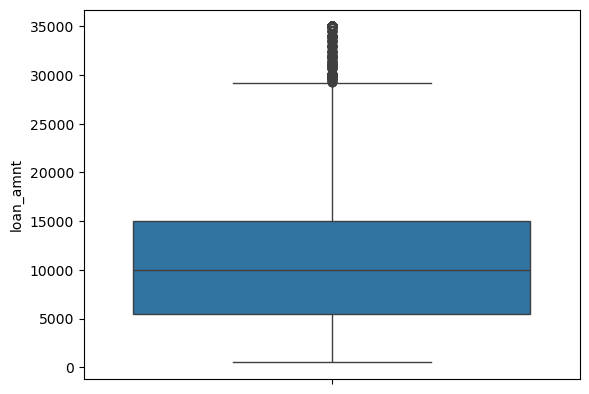

In [116]:
sns.boxplot(loan_data_df['loan_amnt'])


This is indicating the presence of outliers. Hence removing them

<Axes: ylabel='loan_amnt'>

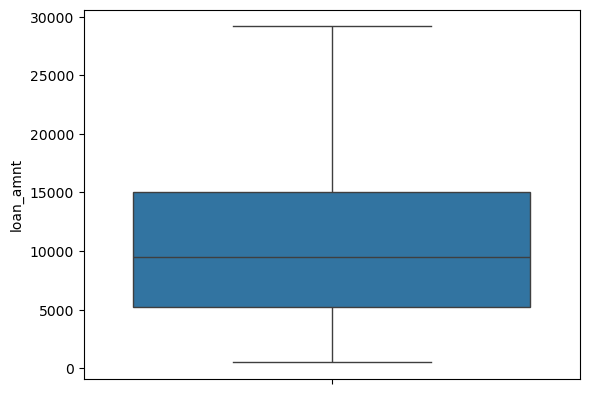

In [117]:
# Removing outliers
Q1 = loan_data_df['loan_amnt'].quantile(0.25)
Q3 = loan_data_df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
loan_data_df = loan_data_df[(loan_data_df['loan_amnt'] >= lower_bound) & (loan_data_df['loan_amnt'] <= upper_bound)]

sns.boxplot(loan_data_df['loan_amnt'])


<Axes: ylabel='funded_amnt_inv'>

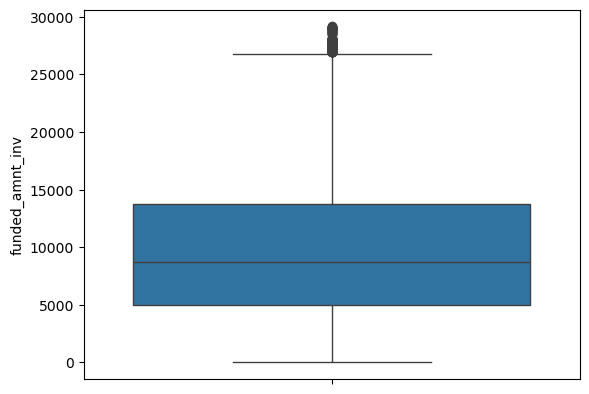

In [118]:
sns.boxplot(loan_data_df['funded_amnt_inv'])


This is indicating the presence of outliers. Hence removing them

<Axes: ylabel='funded_amnt_inv'>

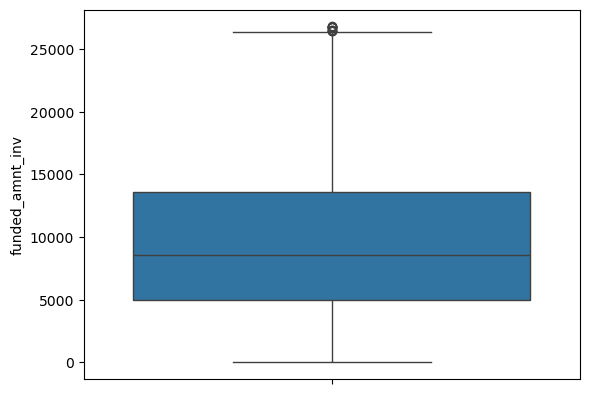

In [119]:
# Removing outliers
Q1 = loan_data_df['funded_amnt_inv'].quantile(0.25)
Q3 = loan_data_df['funded_amnt_inv'].quantile(0.75)
IQR = Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
loan_data_df = loan_data_df[(loan_data_df['funded_amnt_inv'] >= lower_bound) & (loan_data_df['funded_amnt_inv'] <= upper_bound)]

sns.boxplot(loan_data_df['funded_amnt_inv'])


<Axes: ylabel='funded_amnt'>

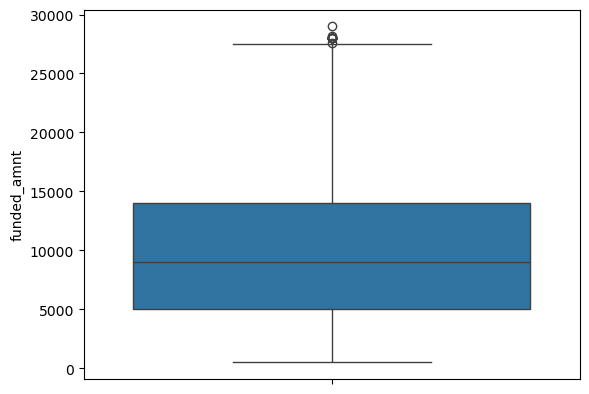

In [120]:
sns.boxplot(loan_data_df['funded_amnt'])


This is indicating the presence of outliers. Hence removing them

<Axes: ylabel='funded_amnt'>

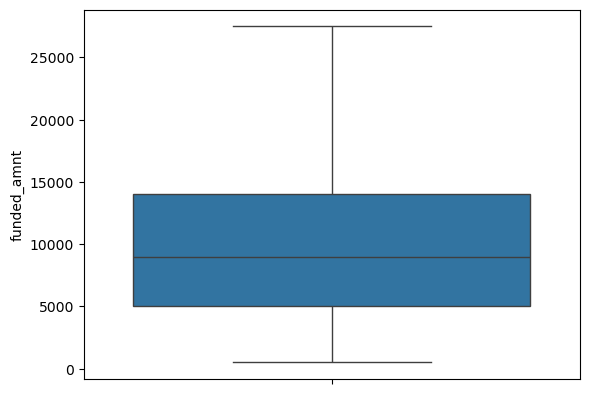

In [121]:
# Removing outliers
Q1 = loan_data_df['funded_amnt'].quantile(0.25)
Q3 = loan_data_df['funded_amnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
loan_data_df = loan_data_df[(loan_data_df['funded_amnt'] >= lower_bound) & (loan_data_df['funded_amnt'] <= upper_bound)]

sns.boxplot(loan_data_df['funded_amnt'])


<Axes: ylabel='int_rate'>

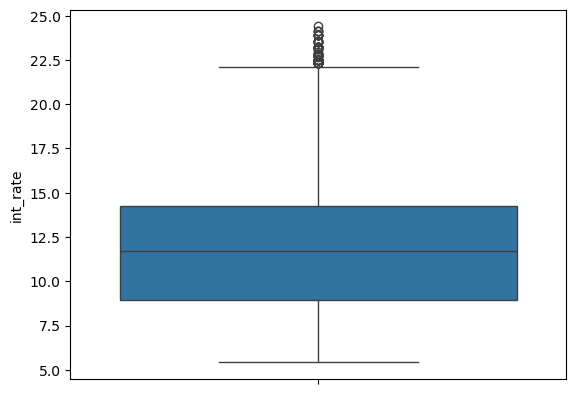

In [122]:
sns.boxplot(loan_data_df['int_rate'])


This is indicating the presence of outliers. Hence removing them

<Axes: ylabel='int_rate'>

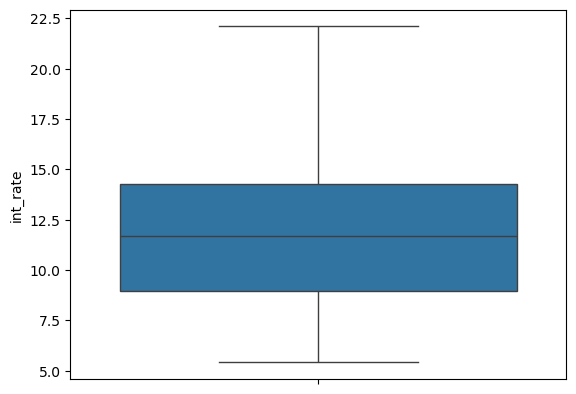

In [123]:
# Removing outliers
Q1 = loan_data_df['int_rate'].quantile(0.25)
Q3 = loan_data_df['int_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
loan_data_df = loan_data_df[(loan_data_df['int_rate'] >= lower_bound) & (loan_data_df['int_rate'] <= upper_bound)]

sns.boxplot(loan_data_df['int_rate'])

<Axes: ylabel='installment'>

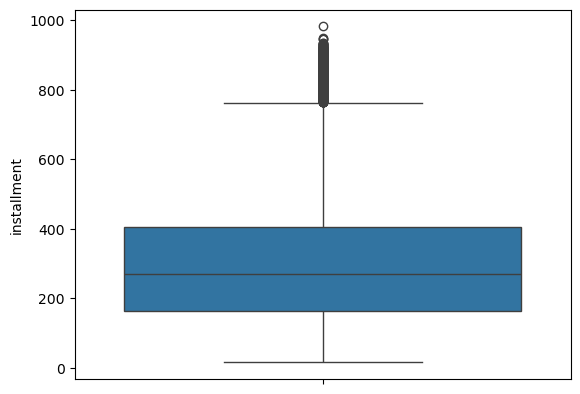

In [124]:
sns.boxplot(loan_data_df['installment'])


This is indicating the presence of outliers. Hence removing them

<Axes: ylabel='installment'>

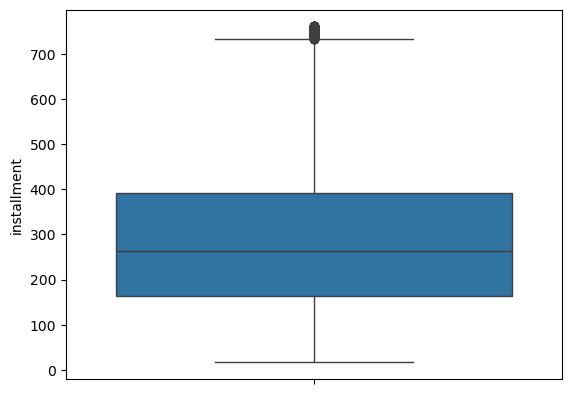

In [125]:
# Removing outliers
Q1 = loan_data_df['installment'].quantile(0.25)
Q3 = loan_data_df['installment'].quantile(0.75)
IQR = Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
loan_data_df = loan_data_df[(loan_data_df['installment'] >= lower_bound) & (loan_data_df['installment'] <= upper_bound)]

sns.boxplot(loan_data_df['installment'])

<Axes: ylabel='dti'>

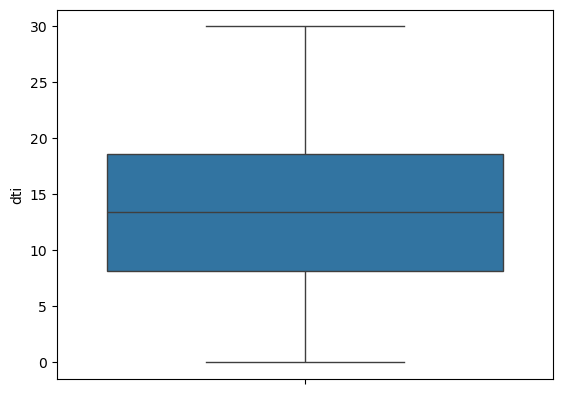

In [126]:
sns.boxplot(loan_data_df['dti'])

Distribution looks good. No need to remove outliers hence proceeding

<Axes: ylabel='annual_inc'>

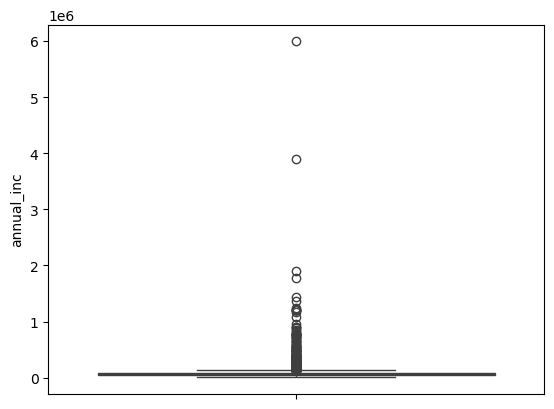

In [127]:
sns.boxplot(loan_data_df['annual_inc'])


This is indicating the presence of outliers. Hence removing them

<Axes: ylabel='annual_inc'>

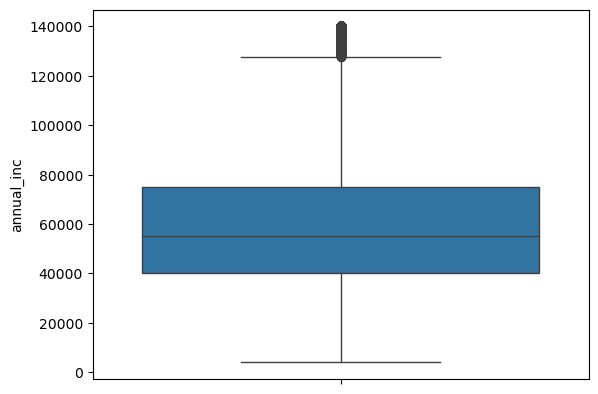

In [128]:
# Removing outliers
Q1 = loan_data_df['annual_inc'].quantile(0.25)
Q3 = loan_data_df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
loan_data_df = loan_data_df[(loan_data_df['annual_inc'] >= lower_bound) & (loan_data_df['annual_inc'] <= upper_bound)]


sns.boxplot(loan_data_df['annual_inc'])


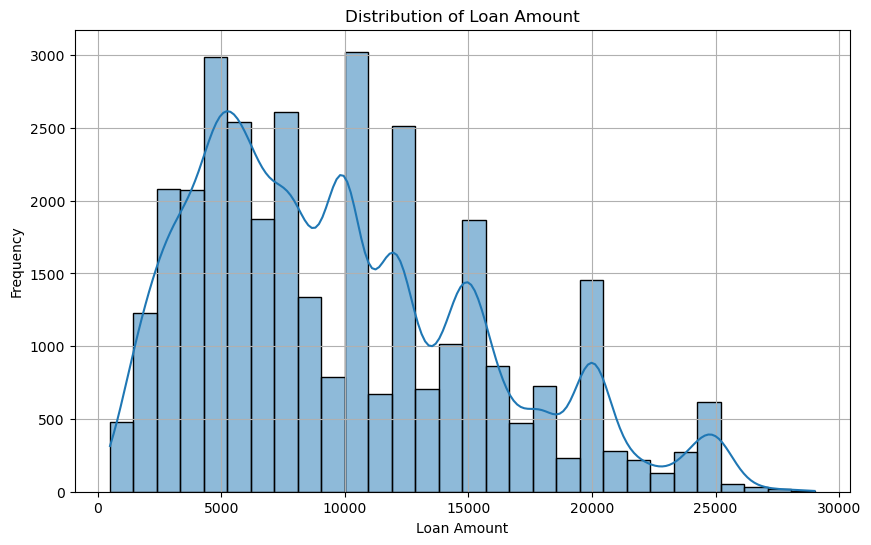

In [129]:
plot.figure(figsize=(10, 6))
sns.histplot(data=loan_data_df, x='loan_amnt',bins=30,kde=True)
plot.title('Distribution of Loan Amount')
plot.xlabel('Loan Amount')
plot.ylabel('Frequency')
plot.grid(True)
plot.show()

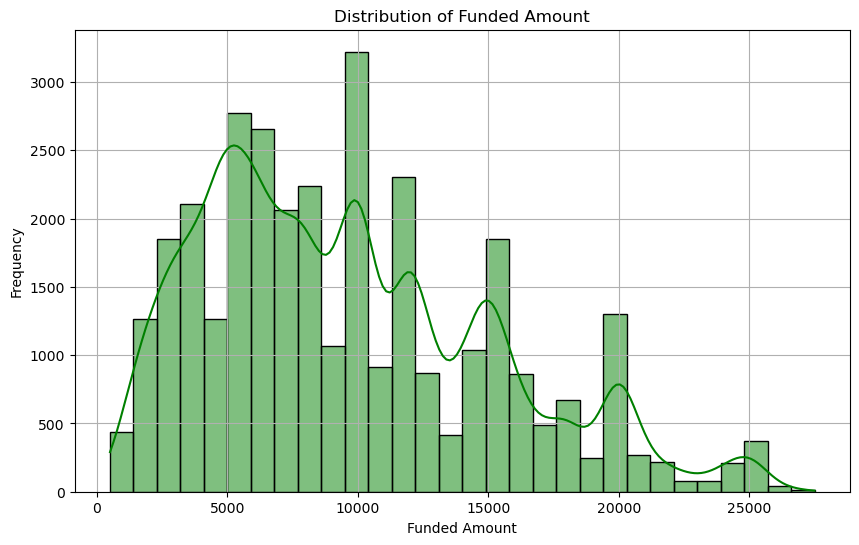

In [130]:
plot.figure(figsize=(10, 6))
sns.histplot(data=loan_data_df, x='funded_amnt',bins=30, color='green',kde=True)
plot.title('Distribution of Funded Amount')
plot.xlabel('Funded Amount')
plot.ylabel('Frequency')
plot.grid(True)
plot.show()

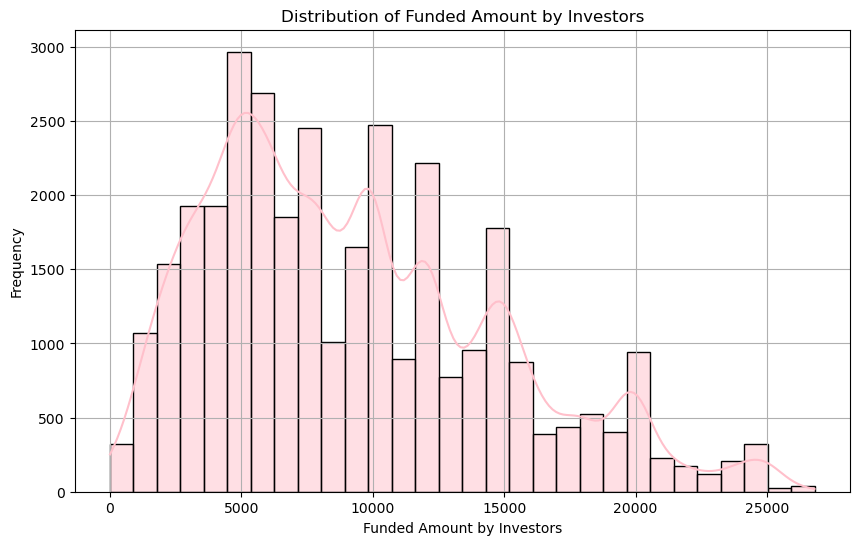

In [131]:
plot.figure(figsize=(10, 6))
sns.histplot(data=loan_data_df, x='funded_amnt_inv',bins=30, color='pink',kde=True)
plot.title('Distribution of Funded Amount by Investors')
plot.xlabel('Funded Amount by Investors')
plot.ylabel('Frequency')
plot.grid(True)
plot.show()

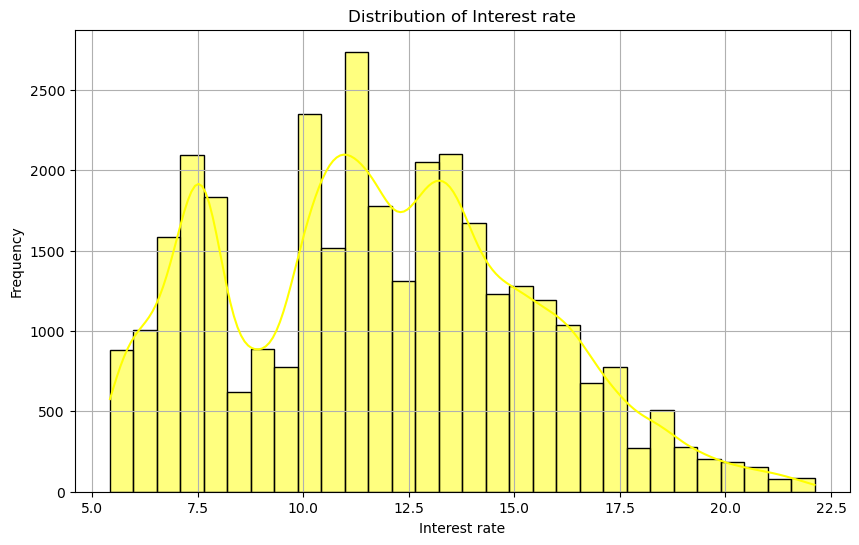

In [132]:
plot.figure(figsize=(10, 6))
sns.histplot(data=loan_data_df, x='int_rate',bins=30, color='yellow',kde=True)
plot.title('Distribution of Interest rate')
plot.xlabel('Interest rate')
plot.ylabel('Frequency')
plot.grid(True)
plot.show()

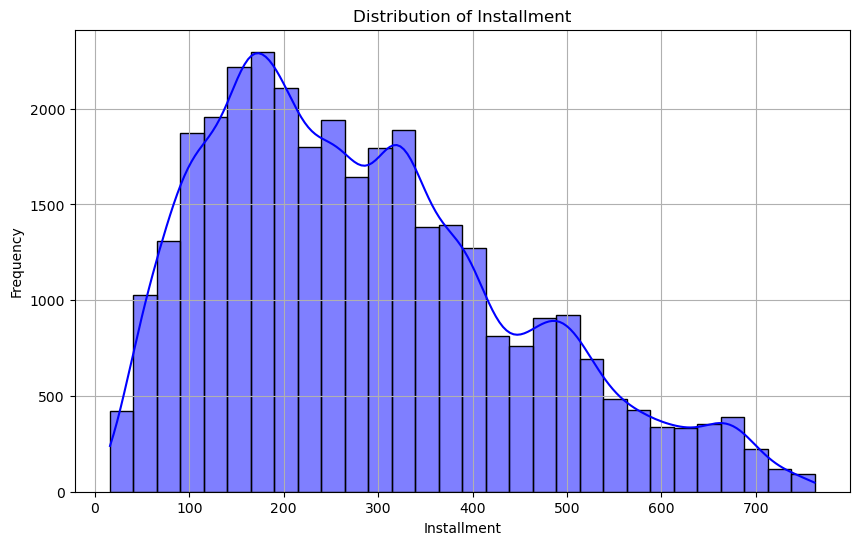

In [133]:
plot.figure(figsize=(10, 6))
sns.histplot(data=loan_data_df, x='installment',bins=30, color='blue',kde=True)
plot.title('Distribution of Installment')
plot.xlabel('Installment')
plot.ylabel('Frequency')
plot.grid(True)
plot.show()

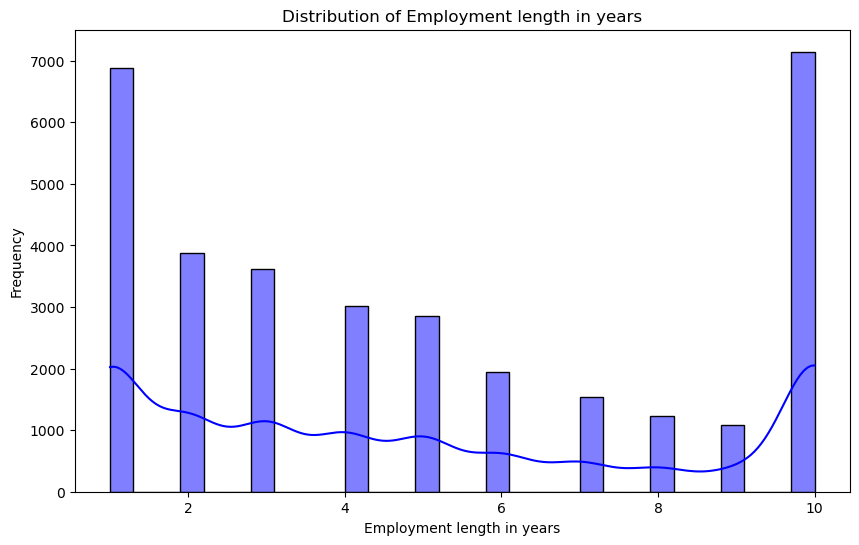

In [134]:
plot.figure(figsize=(10, 6))
sns.histplot(data=loan_data_df, x='emp_length',bins=30, color='blue',kde=True)
plot.title('Distribution of Employment length in years')
plot.xlabel('Employment length in years')
plot.ylabel('Frequency')
plot.show()

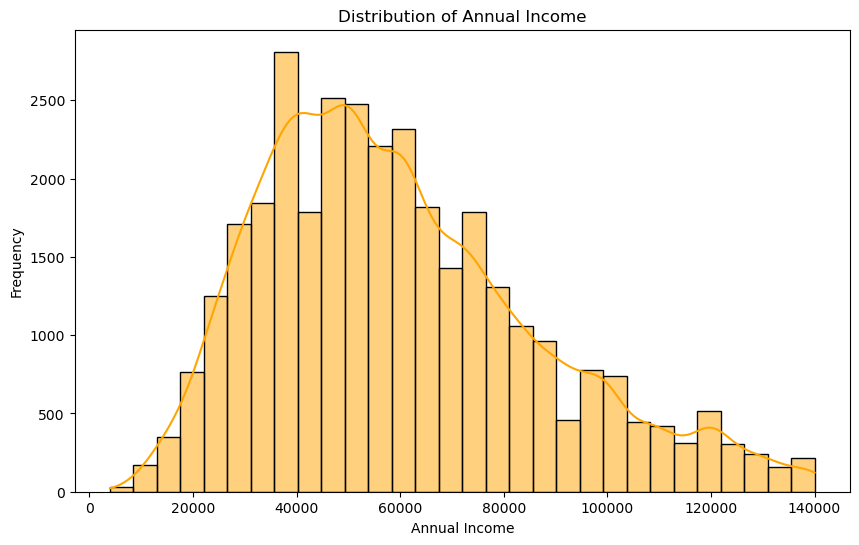

In [135]:
plot.figure(figsize=(10, 6))
sns.histplot(data=loan_data_df, x='annual_inc',bins=30, color='orange',kde=True)
plot.title('Distribution of Annual Income')
plot.xlabel('Annual Income')
plot.ylabel('Frequency')
plot.show()

### Visualizing Categorical Data

<Axes: xlabel='loan_status', ylabel='count'>

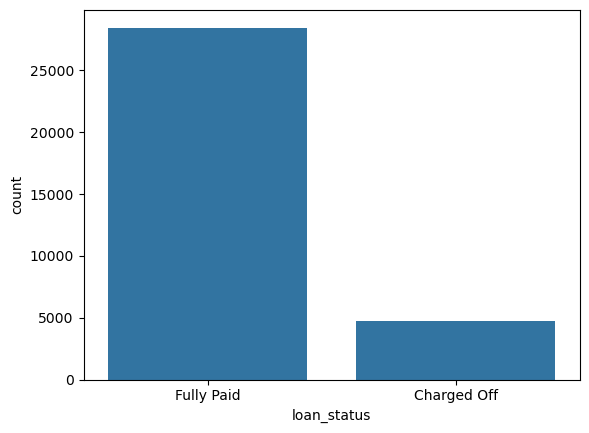

In [136]:
sns.countplot(x = 'loan_status', data = loan_data_df)

In [137]:
# extracting only subgrade (int level value) from the sub_grade variable
loan_data_df['sub_grade'] = pd.to_numeric(loan_data_df['sub_grade'].apply(lambda x : x[-1]))


<Axes: xlabel='int_rate_bucket', ylabel='count'>

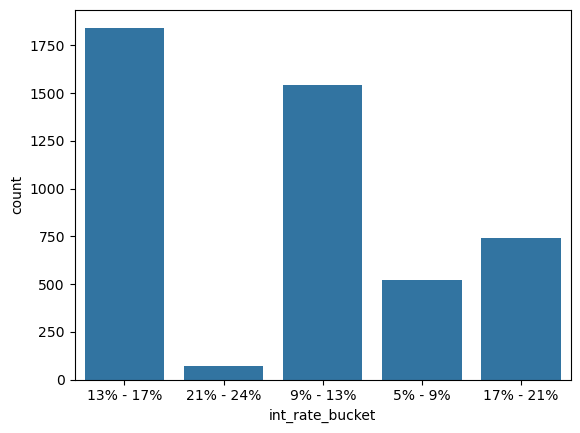

In [138]:
#Bucketing Interest rate
def bucket_int_rate(column):
    if (column >=5) and (column <= 9):
        return '5% - 9%' # 25% quartile
    elif (column >9) and (column <= 13):
        return '9% - 13%'
    elif (column >13) and (column <= 17):
        return '13% - 17%'
    elif (column >17) and (column <= 21):
        return '17% - 21%'
    elif (column >21) and (column <= 24):
        return '21% - 24%'


loan_data_df['int_rate_bucket'] = loan_data_df.apply(lambda x: bucket_int_rate(x['int_rate']), axis = 1)
sns.countplot(x='int_rate_bucket', data=loan_data_df[loan_data_df.loan_status == 'Charged Off'])


<Axes: xlabel='home_ownership', ylabel='count'>

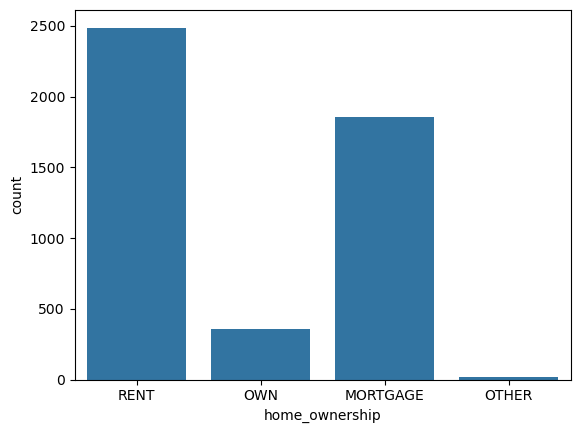

In [139]:
# Analysing the distribution of 'home_ownership' when loan status is charged off
loan_data_df['home_ownership'].value_counts()
#replacing 'NONE' with 'OTHERS'
loan_data_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
sns.countplot(x='home_ownership', data=loan_data_df[loan_data_df.loan_status == 'Charged Off'])


<Axes: xlabel='count', ylabel='purpose'>

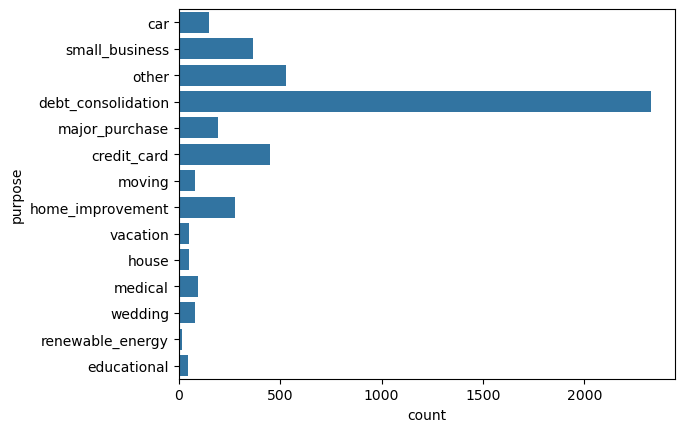

In [140]:
# Analysing the distribution of 'purpose' when loan status is charged off

sns.countplot(y ='purpose', data=loan_data_df[loan_data_df.loan_status == 'Charged Off'])


<Axes: xlabel='count', ylabel='term'>

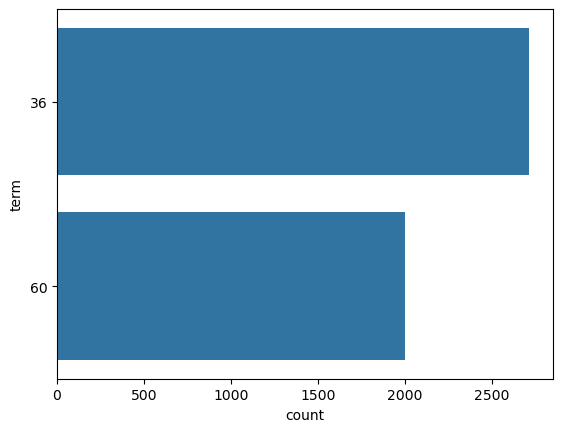

In [141]:
# Analysing the distribution of 'term' when loan status is charged off

sns.countplot(y ='term', data=loan_data_df[loan_data_df.loan_status == 'Charged Off'])

<Axes: xlabel='issue_year', ylabel='count'>

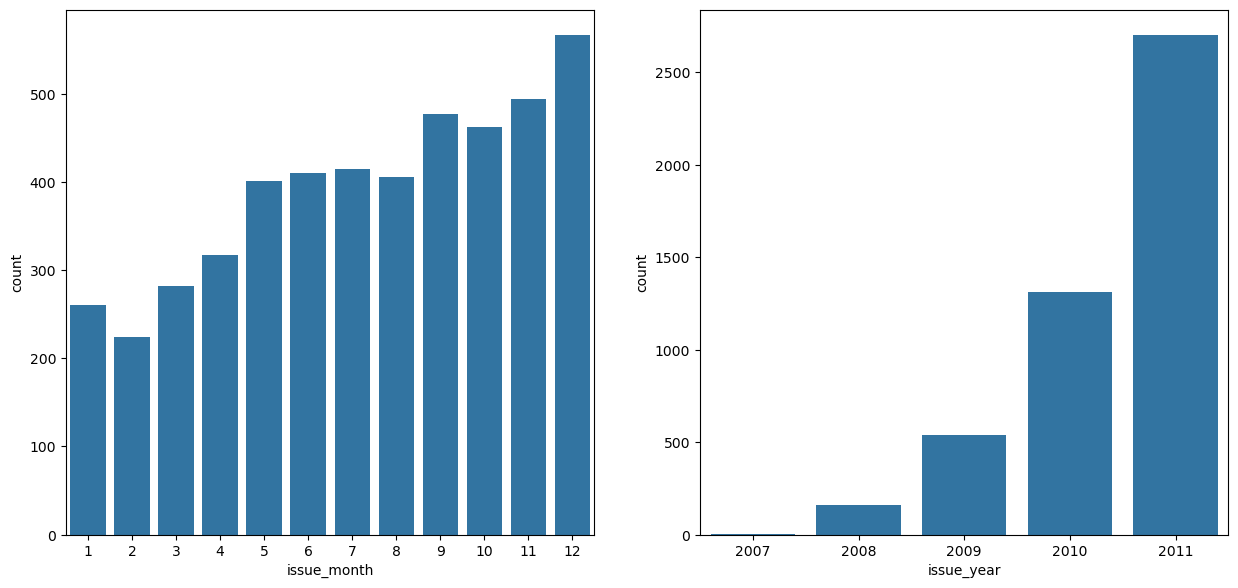

In [142]:
# Analysing the distribution of 'issue_year' when loan status is charged off
plot.figure(figsize=(15,15))
plot.subplot(221)
sns.countplot(x='issue_month', data=loan_data_df[loan_data_df['loan_status']=='Charged Off'])
plot.subplot(222)
sns.countplot(x='issue_year', data=loan_data_df[loan_data_df['loan_status']=='Charged Off'])


# 5. Bivariate Analysis

### Annual income vs loan purpose

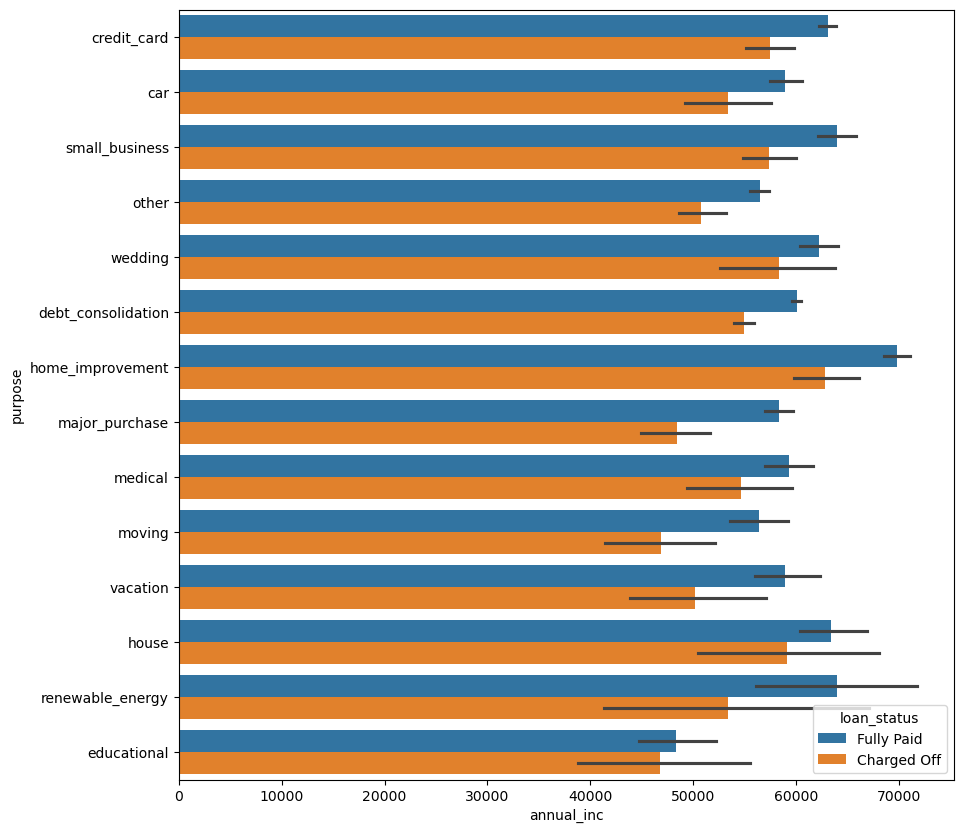

In [143]:
plot.figure(figsize=(10,10))
sns.barplot(data =loan_data_df,x='annual_inc', y='purpose', hue ='loan_status')
plot.show()

Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

### Annual income vs home ownership

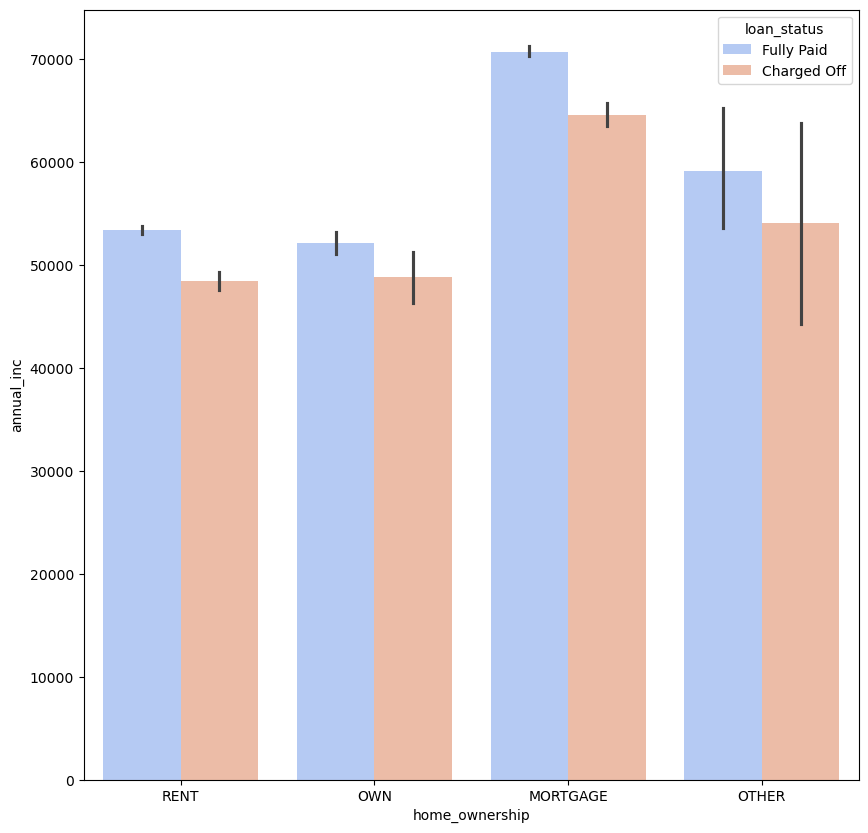

In [144]:
plot.figure(figsize=(10,10))
sns.barplot(data =loan_data_df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="coolwarm")
plot.show()

Applicants with higher salary mostly have home ownership status as 'MORTGAGE'

### Annual Income vs Loan Amount

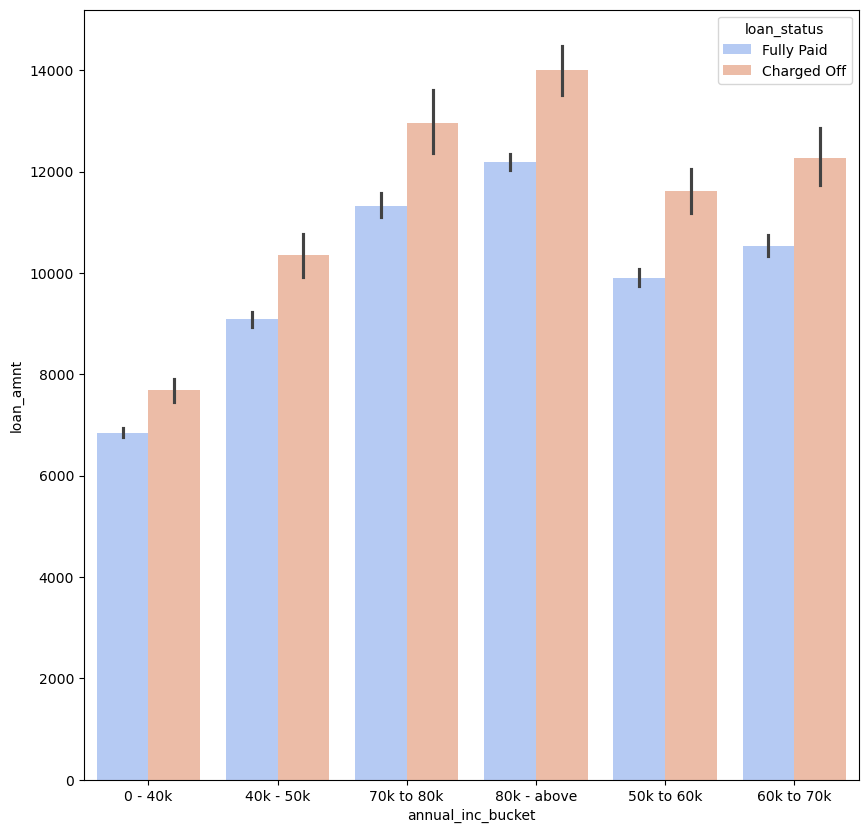

In [145]:
# Bucketing Annual Income

#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_data_df['annual_inc_bucket'] = loan_data_df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)



plot.figure(figsize=(10,10))
sns.barplot(data =loan_data_df,x='annual_inc_bucket', y='loan_amnt', hue ='loan_status',palette="coolwarm")
plot.show()


Across all the income groups, the loan_amount is higher for people who defaulted.


###  Loan Amount vs Purpose

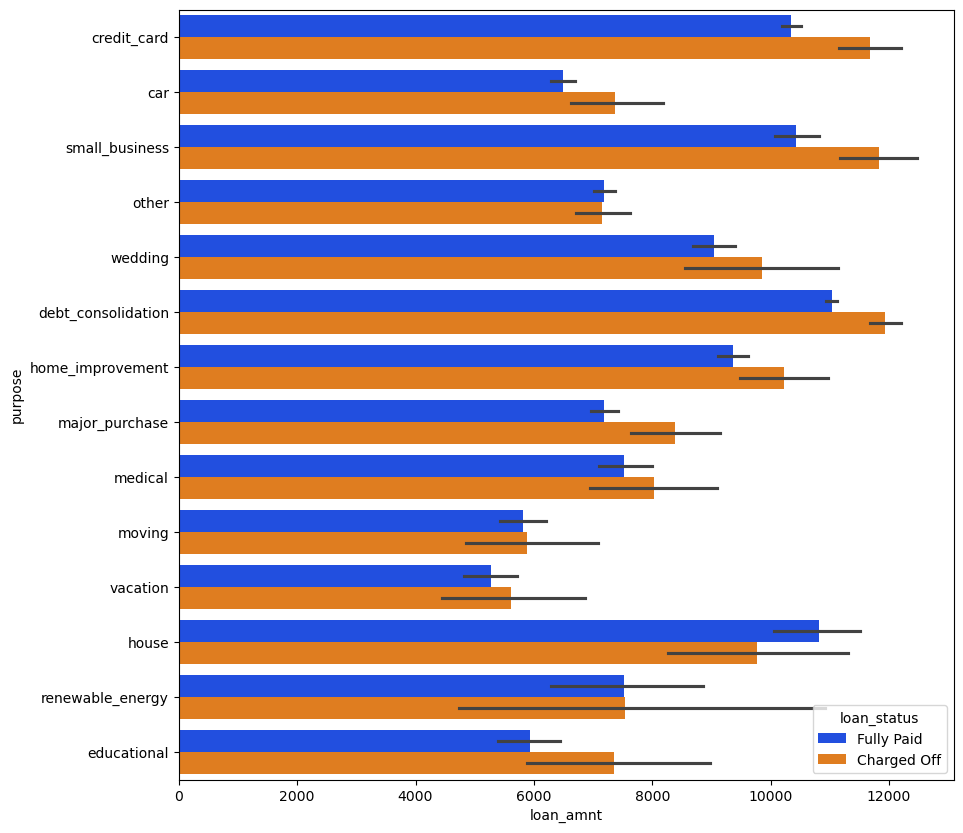

In [146]:
plot.figure(figsize=(10,10))
sns.barplot(data =loan_data_df,x='loan_amnt', y='purpose', hue ='loan_status',palette="bright")
plot.show()

Most of the purposes, the loan_amount is higher for people who defaulted.

### Loan vs House Ownership

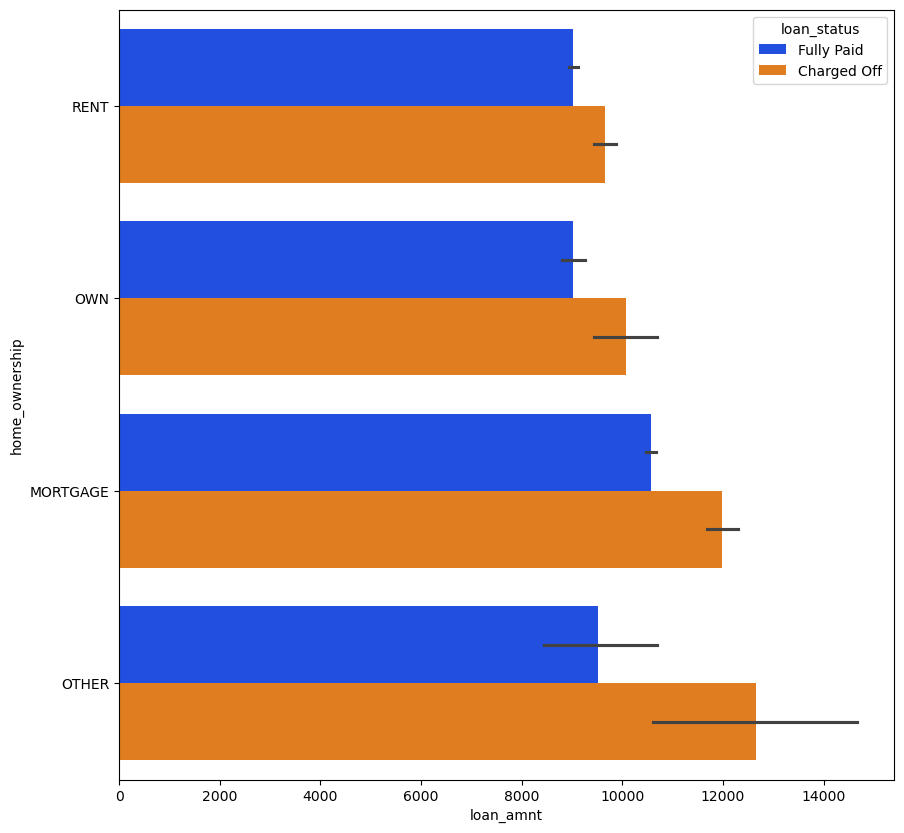

In [147]:
plot.figure(figsize=(10,10))
sns.barplot(data =loan_data_df,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="bright")
plot.show()

### Loan amount vs Year issued

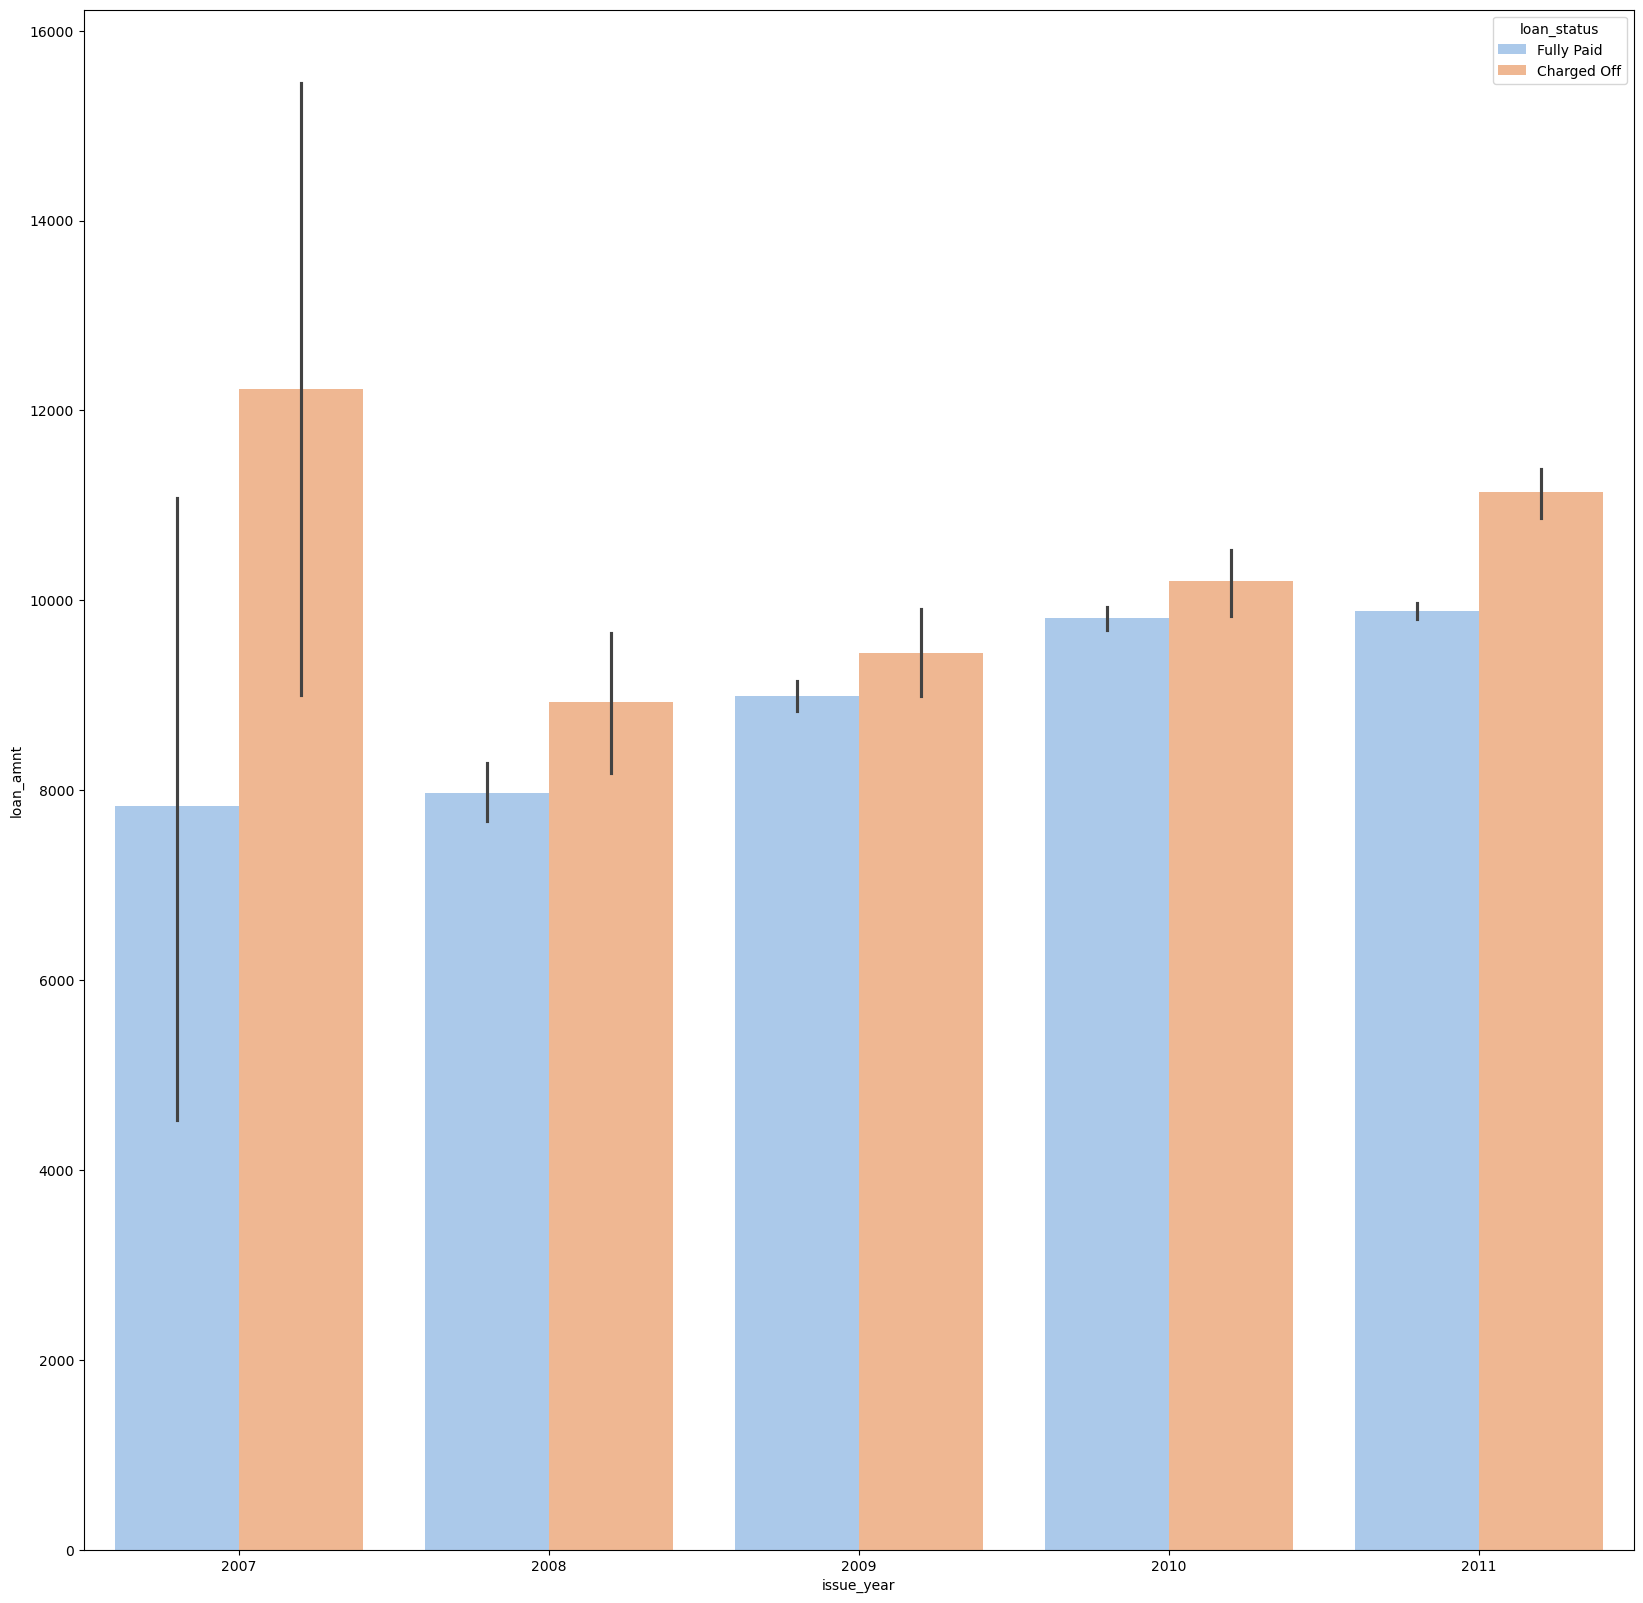

In [148]:
plot.figure(figsize=(20,20))
sns.barplot(data =loan_data_df,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")
plot.show()

The highest amount of loan is issued in the year 2011

### Loan amount vs Employment Length

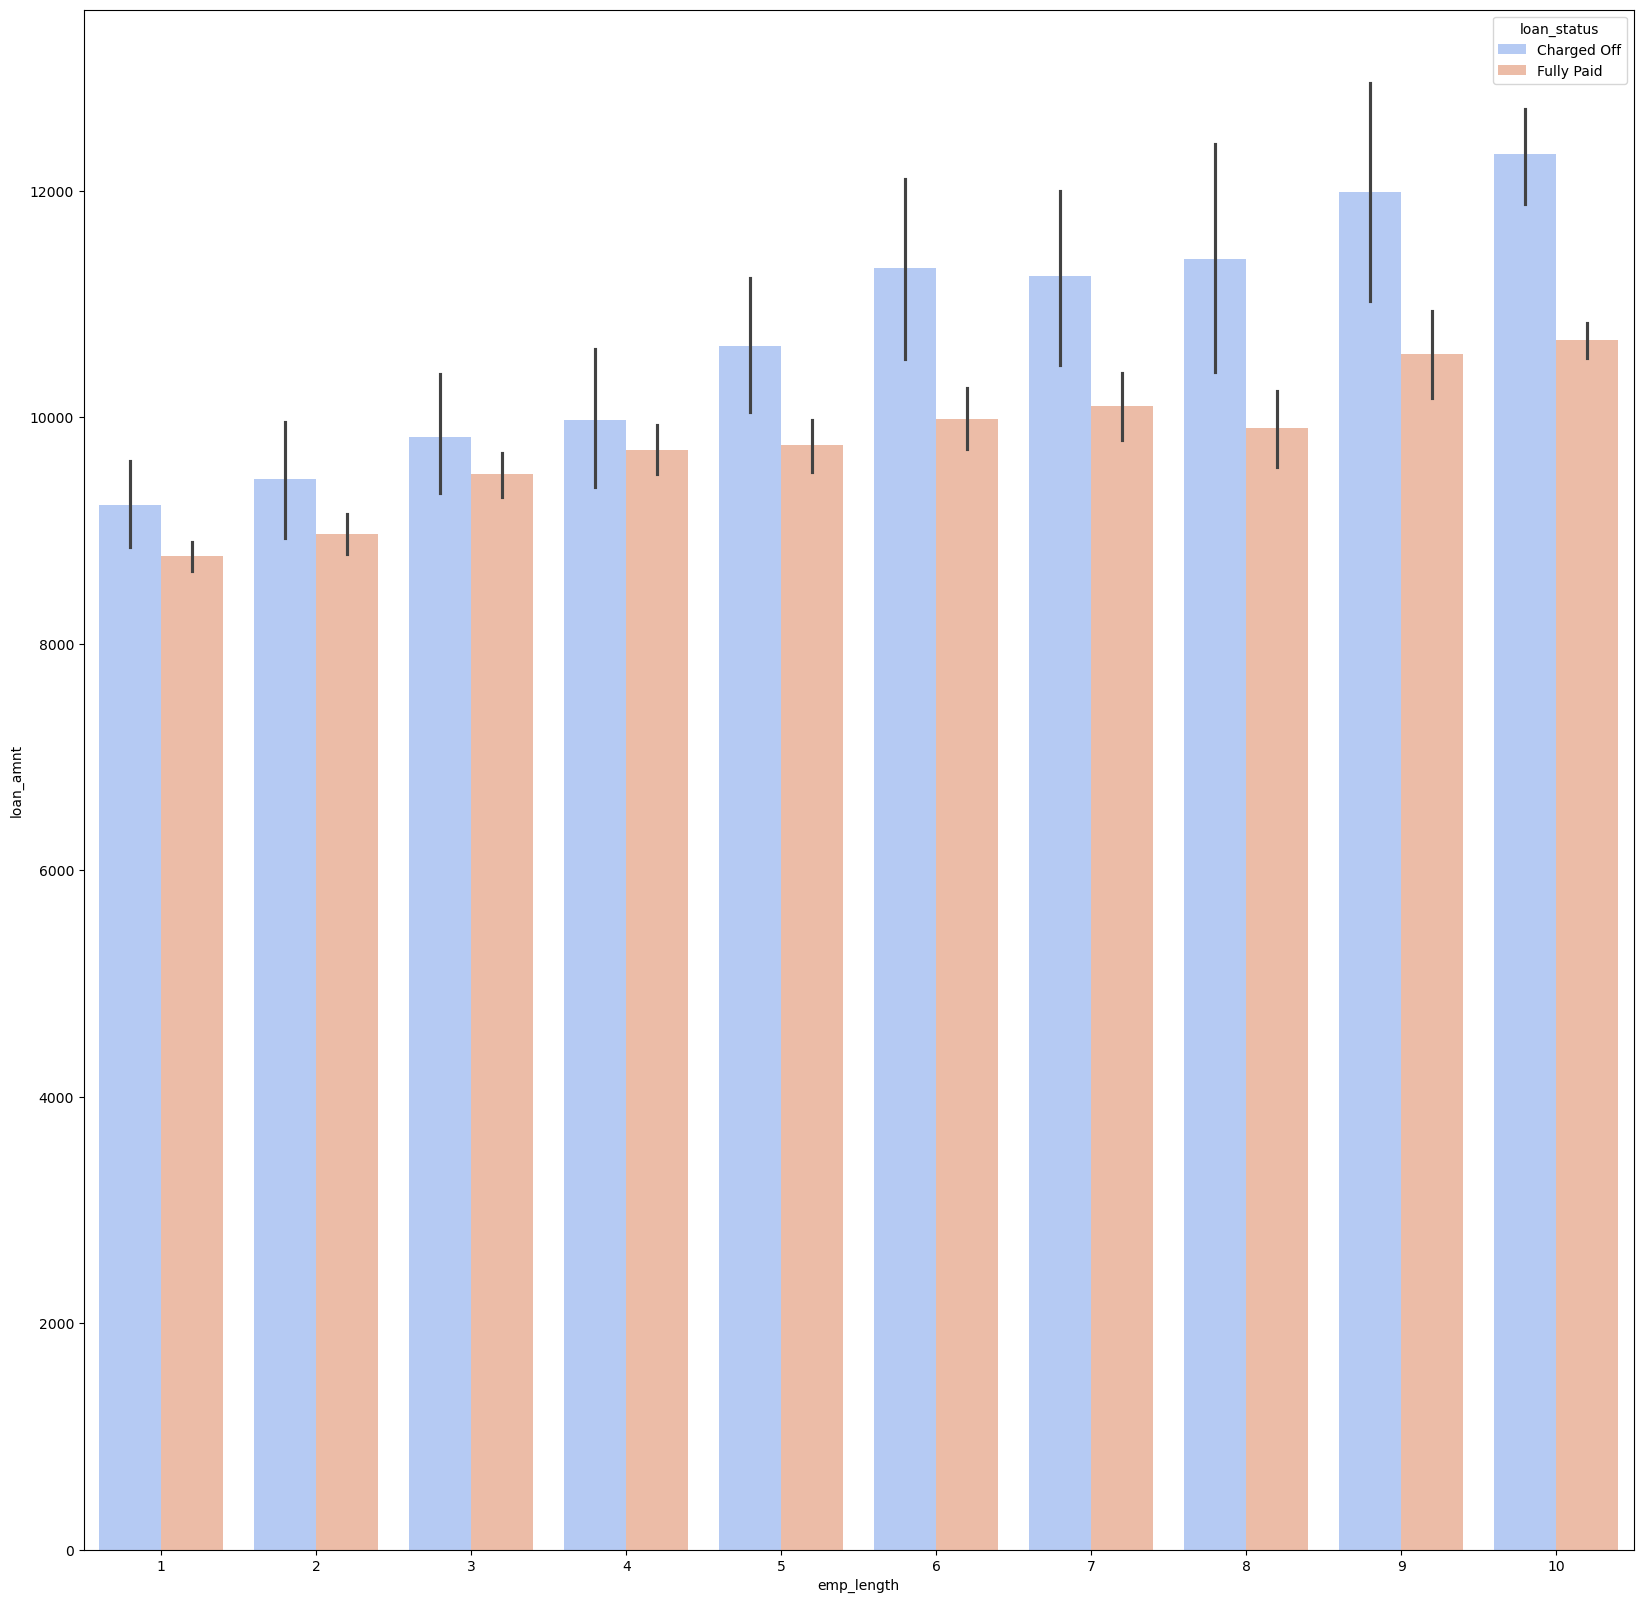

In [149]:
plot.figure(figsize=(20,20))
sns.barplot(data =loan_data_df,y='loan_amnt', x='emp_length', hue ='loan_status',palette="coolwarm")
plot.show()

Across all the employment length groups, the loan_amount is higher for people who defaulted.

### Loan amount vs Grade

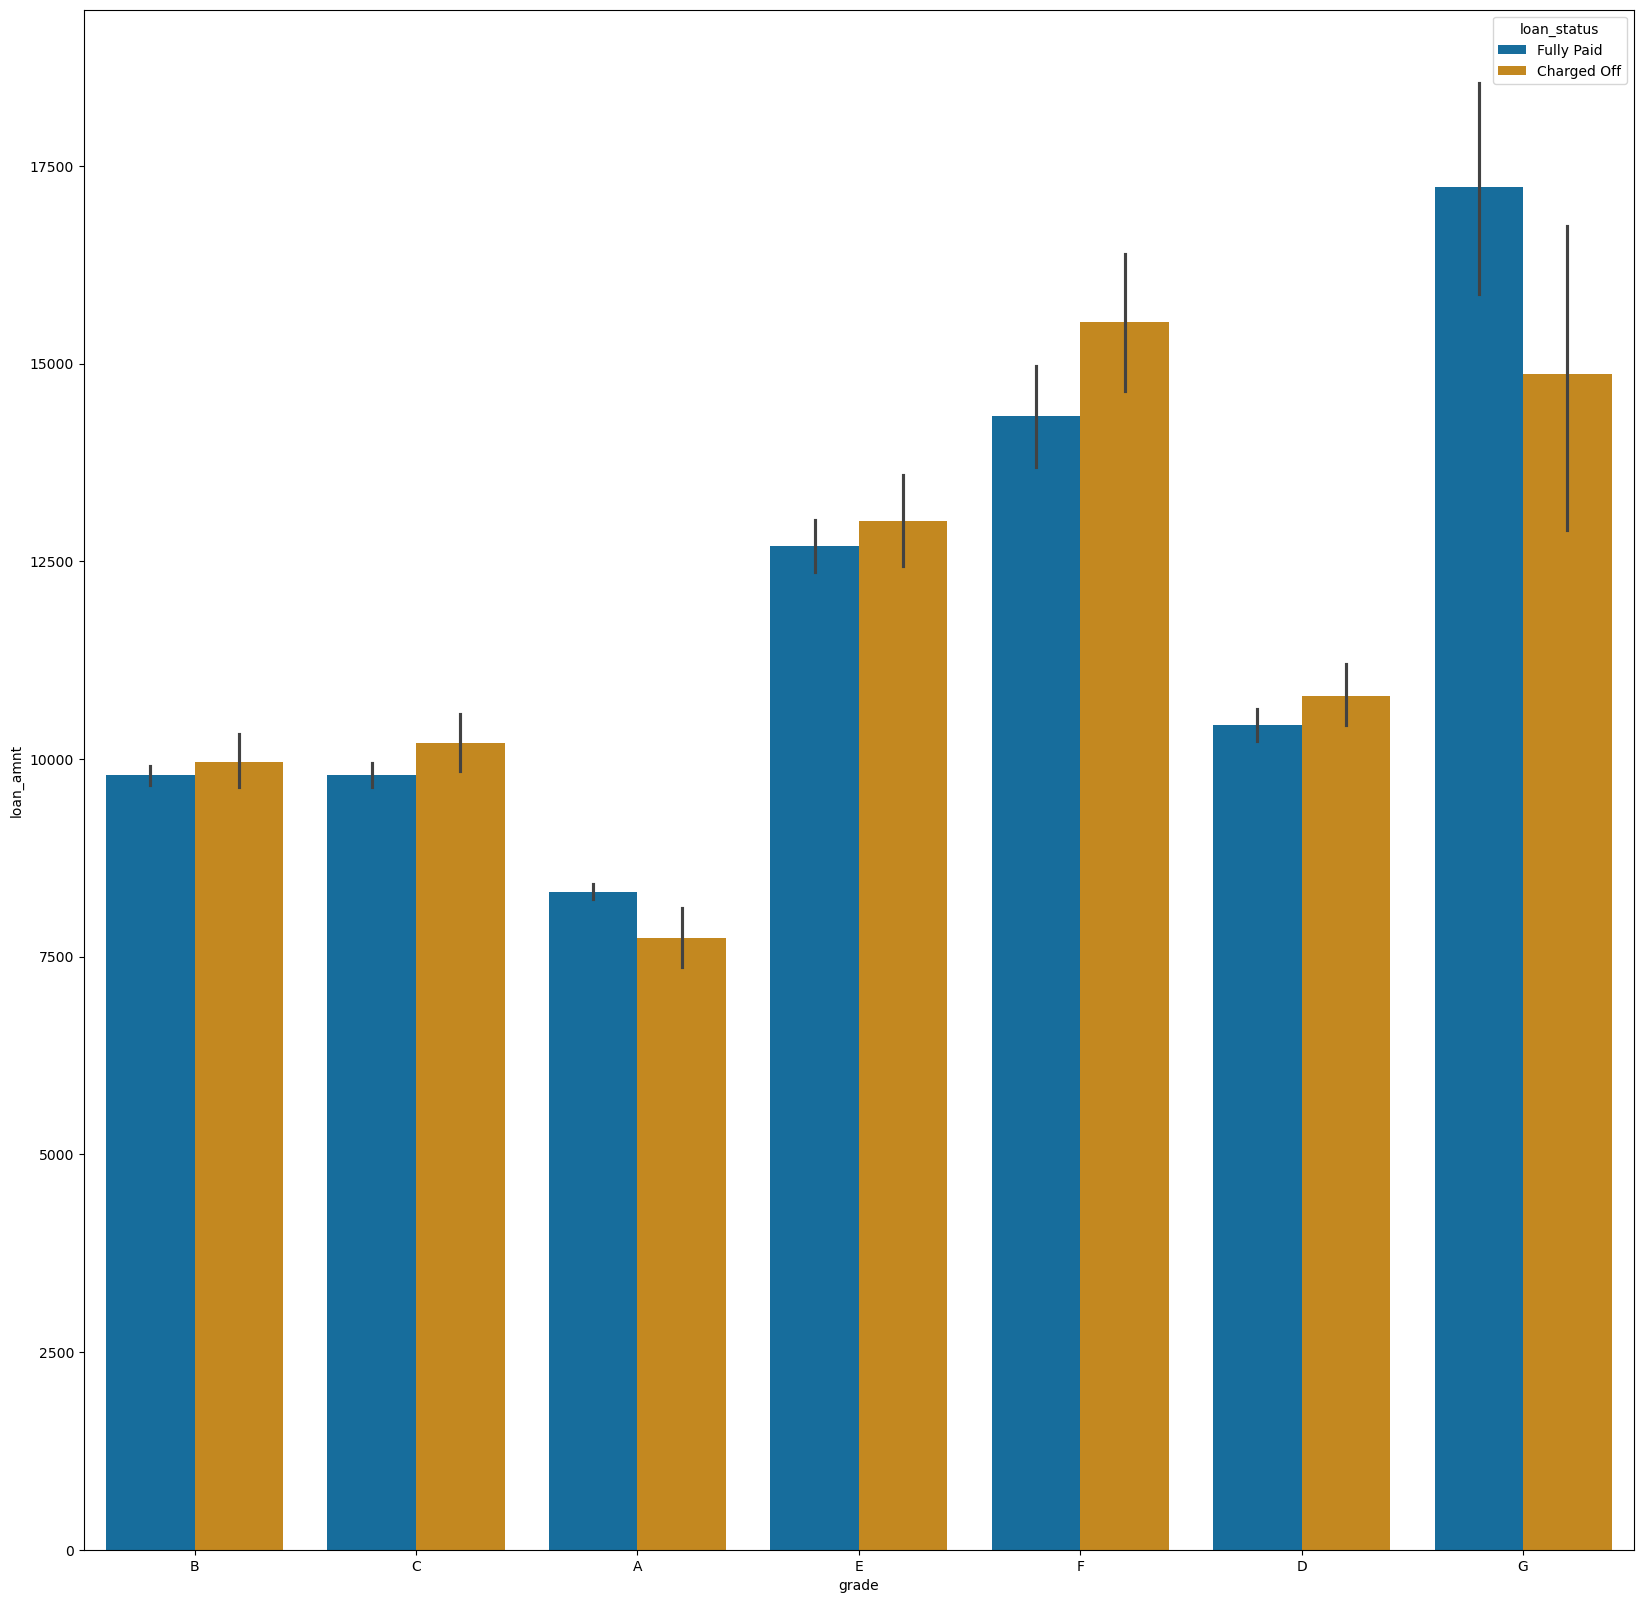

In [150]:
plot.figure(figsize=(20,20))
sns.barplot(data =loan_data_df,y='loan_amnt', x='grade', hue ='loan_status',palette="colorblind")
plot.show()

People who defaulted more when grade is F and loan amount is between 15k-20k

### Grade vs Interest rate

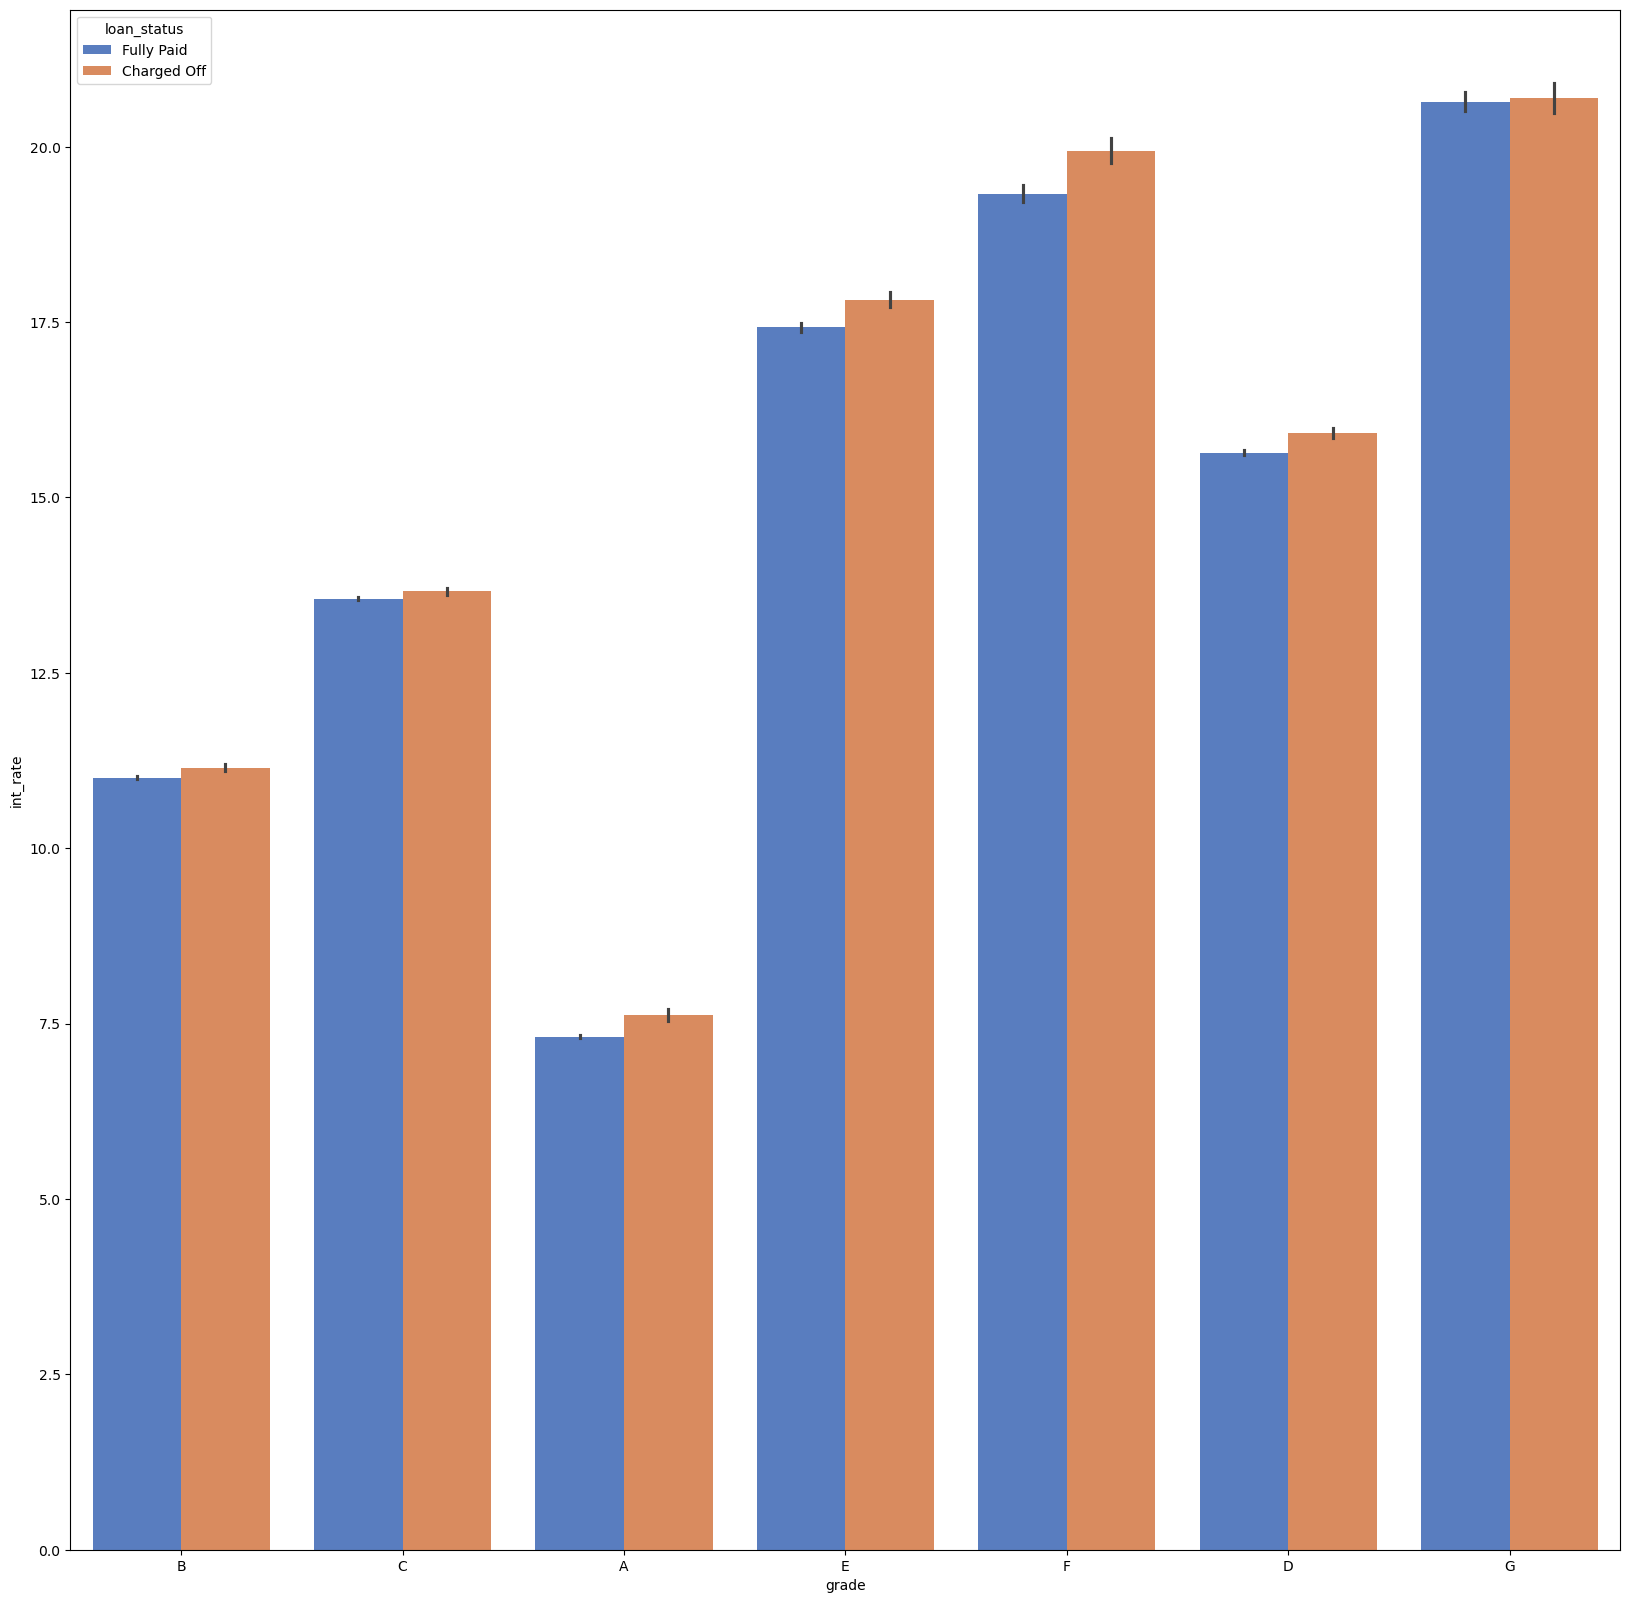

In [151]:
plot.figure(figsize=(20,20))
sns.barplot(data =loan_data_df,y='int_rate', x='grade', hue ='loan_status',palette="muted")
plot.show()

People who defaulted more when grade G and interest rate above 20%

# 6. Correlation

In [152]:
loan_data_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'issue_year', 'issue_month', 'int_rate_bucket', 'annual_inc_bucket'],
      dtype='object')

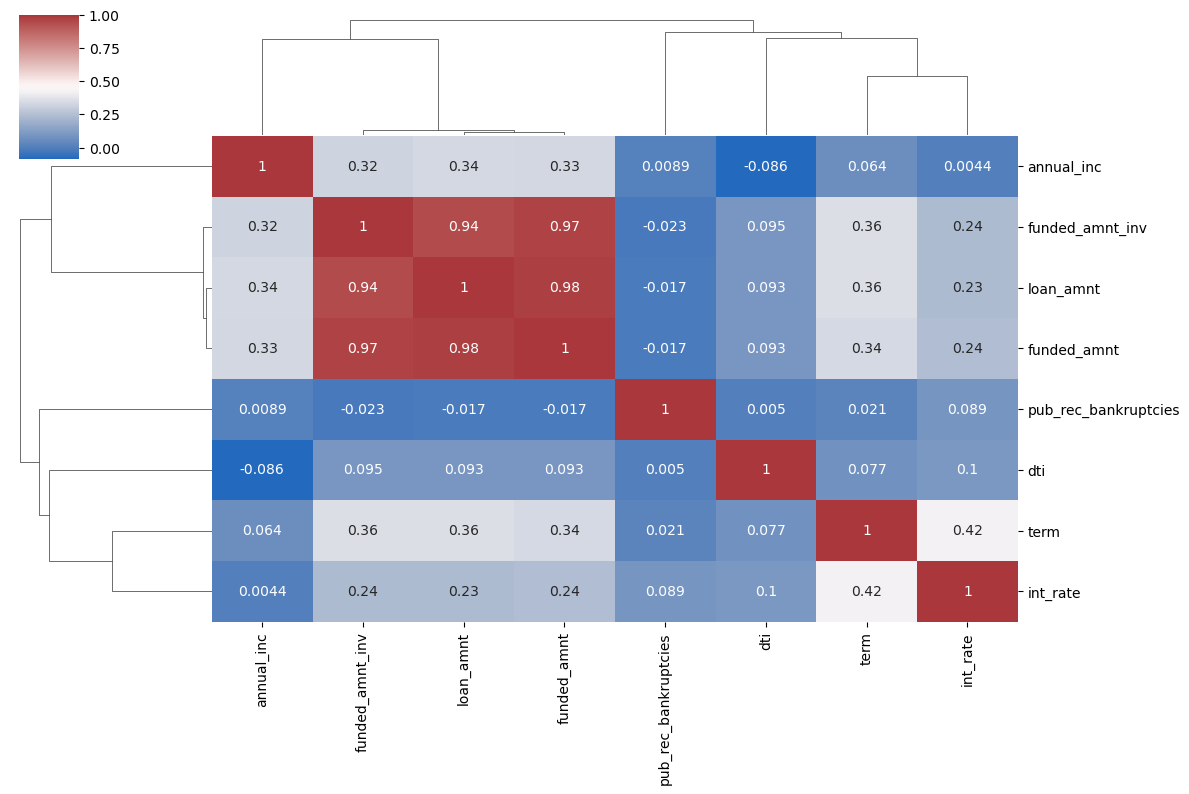

In [153]:
corr_data=loan_data_df
# Only keeping the numeric columns for which we need to know the correlations. Dropping the rest of the columns.
corr_data = corr_data.drop(columns=['id','grade','issue_year', 'issue_month', 'int_rate_bucket', 'annual_inc_bucket','purpose', 'zip_code', 'addr_state','verification_status', 'issue_d', 'loan_status','sub_grade', 'emp_length', 'home_ownership','installment'])
corr = corr_data.corr()
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="vlag")
plot.show()

Strong Correlation:

1.loan_amt has a strong correlation with funded_amt

2.loan_amt has a strong correlation with funded_amt_inv

3.lfunded_amt has a strong correlation with funded_amt_inv


Negative Correlation:

1.loan_amnt, funded_amount, funded_amount_inv have negative correlation with pub_rec_bankrupticies

2.annual income has a negative correlation with dti